# Robustic Regression Analysis
*In the influence of outliers........*
### 1.) Huber-Loss regression
### 2.) Theil-Sen regression 
### 3.) RANSAC regression


In [1]:
# We will take a regression sample from sklearn [to compare with true coefs.]
#also we do comparison with linear regression 

## 1.) Huber Regressor
*which best fits the plane among the features even having more number of outliers*<br>
### It differs from by introducing optimized huber loss fn which segregates the outliers by threshold param 
### It computes trad. loss (MSE) for the points having e < thres. & having an optimized loss fn (to cut down outlier) will be computes for the points having e> thresh. <br>
*detailed formula!*
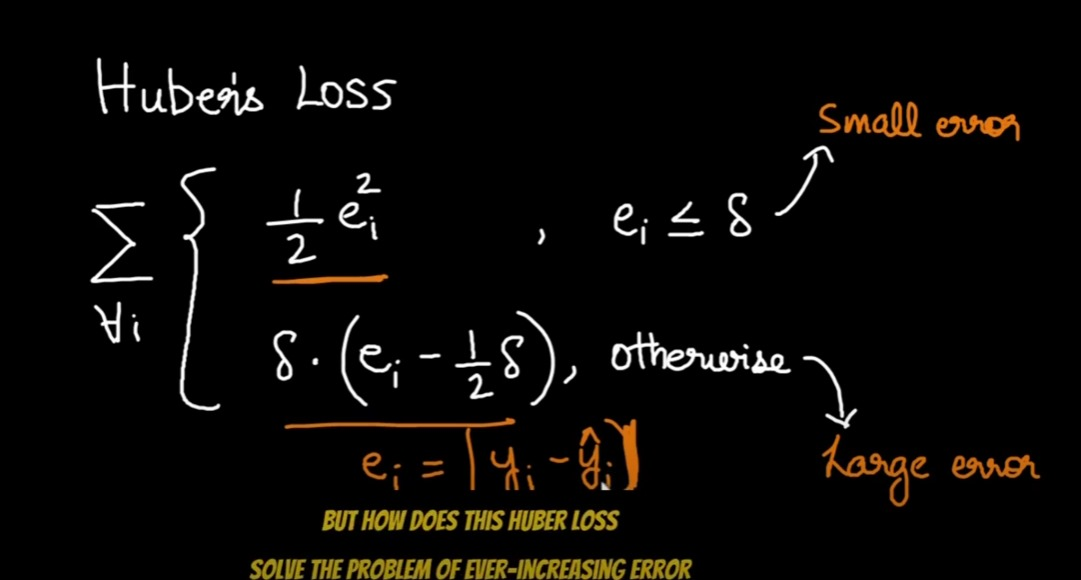

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
rng = np.random.RandomState(0)

In [77]:
X, y, coef = make_regression(
    n_samples=200, n_features=1, noise=4.0, coef=True, random_state=0)

In [80]:
X[:4] = rng.uniform(10, 20, (4, 1))
y[:4] = rng.uniform(10, 20, 4)

In [81]:
huber = HuberRegressor()
huber.fit(X,y)

HuberRegressor()

In [82]:
huber.score(X,y)

-4.476855087936469

In [88]:
huber.predict(X[5].reshape(1,1) ), y[5]# 1st row

(array([-48.2682218]), -41.33990958184328)

Text(0, 0.5, 'Y Values->')

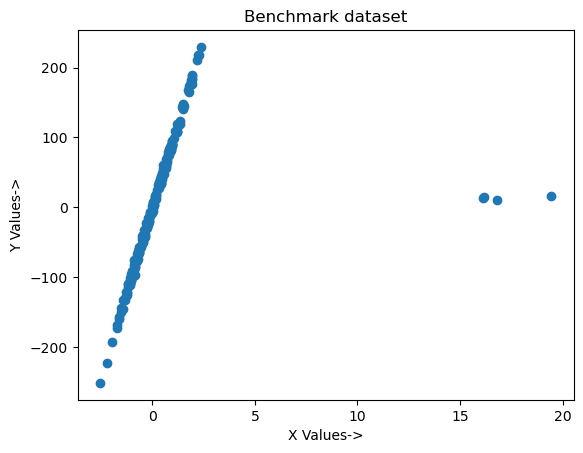

In [93]:
plt.scatter(X,y)
plt.title('Benchmark dataset')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

In [109]:
y_pred = huber.predict(X)

Text(0, 0.5, 'Y Values->')

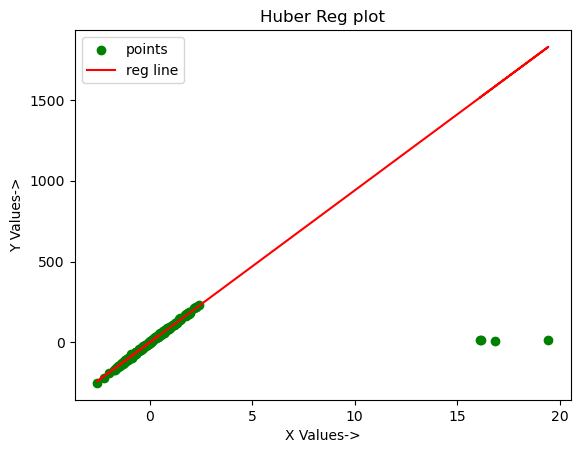

In [110]:
plt.scatter(X,y,c='green',label='points')
plt.plot(X,y_pred,c='red',label='reg line')
plt.legend()
plt.title('Huber Reg plot')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

### We can clearly see that our(huber) reg (best fit line) exceptionally fit leaving out the outliers...

### Try to compare with linear regression

In [104]:
lin = LinearRegression()
lin.fit(X,y)

LinearRegression()

In [112]:
y_pred = lin.predict(X)

Text(0, 0.5, 'Y Values->')

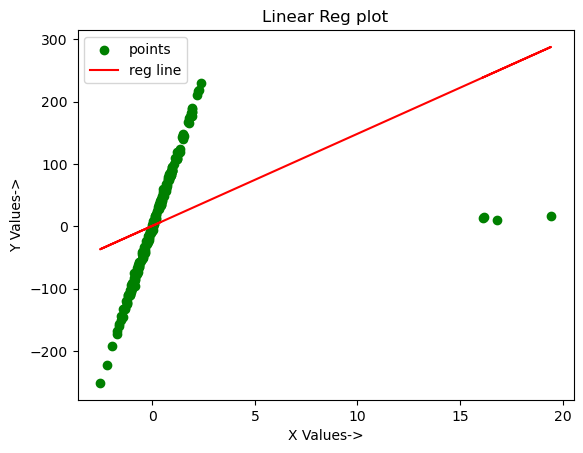

In [113]:
plt.scatter(X,y,c='green',label='points')
plt.plot(X,y_pred,c='red',label='reg line')
plt.legend()
plt.title('Linear Reg plot')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

### We can see that our traditional linear regression algorithm has been vitaly influenced by the presence of outliers 
### Definetly this was not the best fit tooo!

In [115]:
# let's compare with original coeffss
print('Original : ',coef)
print('huber : ',huber.coef_)
print('Linear : ',lin.coef_)


Original :  96.19363785472291
huber :  [94.05924475]
Linear :  [14.75401889]


### Huber matches it ! ✔️


---------------------------------------------------------------------------------------

## 2.) Theil-Sen Regression
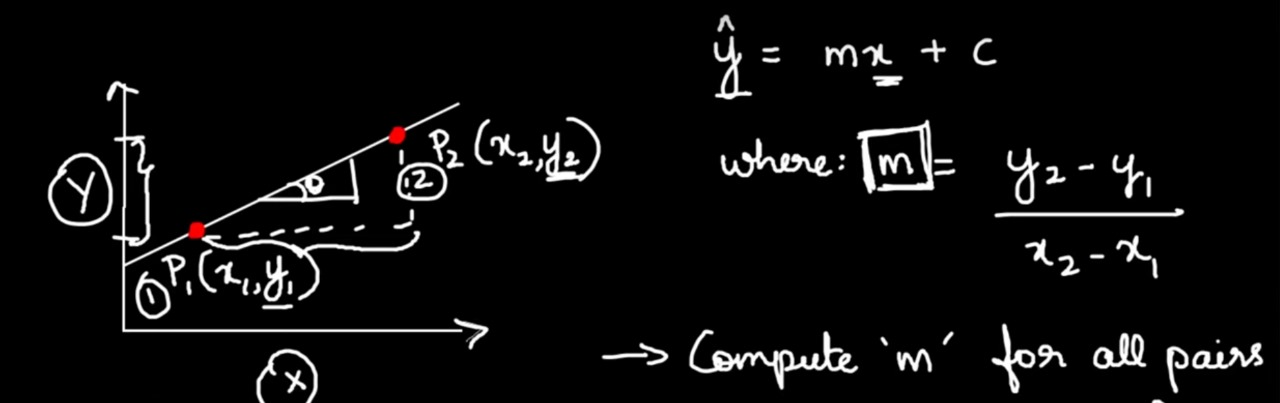

STEP:<br>
1.) compute n C 2 pairs of data points ,<br>
2.) calculating the scope for every for pair of points m=(y2-y1)/(x2-x1)<br>
3.) Choosing the median  of those scopes M = {m1,m2,...mn}<br>
4.) similarly calculate the bias (median) b = {b1,b2,...bn}<br>
5.) by the by we are ignoring the slopes and biases which are extremely low & high (which are potentially outliers)<br>

In [118]:
ts = TheilSenRegressor()
ts.fit(X,y)

TheilSenRegressor()

In [120]:
y_pred = ts.predict(X)

Text(0, 0.5, 'Y Values->')

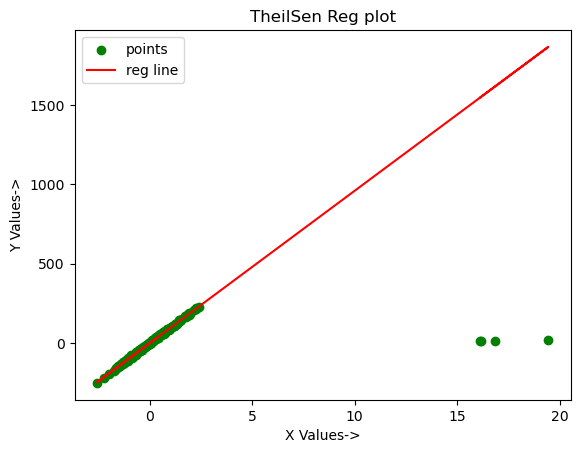

In [121]:
plt.scatter(X,y,c='green',label='points')
plt.plot(X,y_pred,c='red',label='reg line')
plt.legend()
plt.title('TheilSen Reg plot')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

In [122]:
# let's compare with original coeffss
print('Original : ',coef)
print('huber : ',ts.coef_)
print('Linear : ',lin.coef_)


Original :  96.19363785472291
huber :  [96.01070059]
Linear :  [14.75401889]


### WOW! It matches OG coef almost 💯 .

---------------------------------------------------------------------------------------

## 3.) RANSAC Regressor
### Random Sample Consensus 

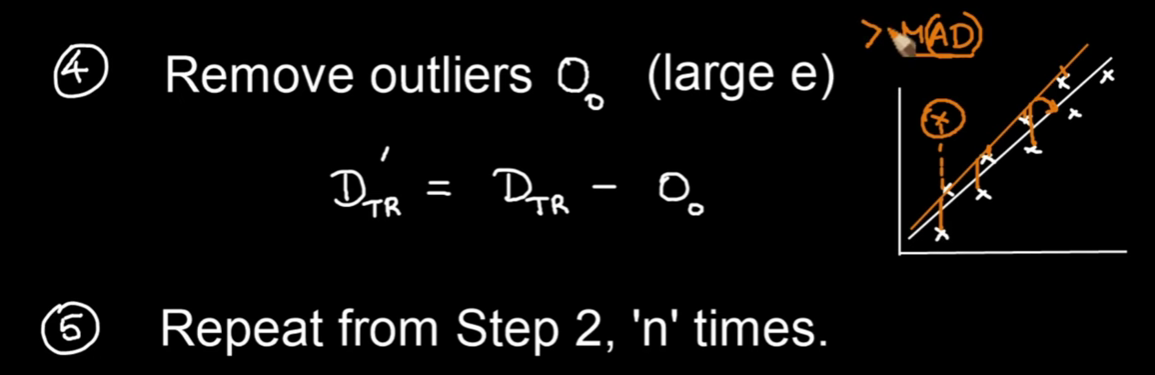

It drews N random samples from the Training data and fit the model. <br>
after it choose the points which are having Mean absolute deviation > threshold -> outlier <br>
It subtracts those points(outliers) from the original point <br>
It will iterate over some n no of times or by looking the min changes in coeffs.. 


In [128]:
rs = RANSACRegressor()
rs.fit(X,y)

RANSACRegressor()

In [129]:
y_pred = rs.predict(X)

Text(0, 0.5, 'Y Values->')

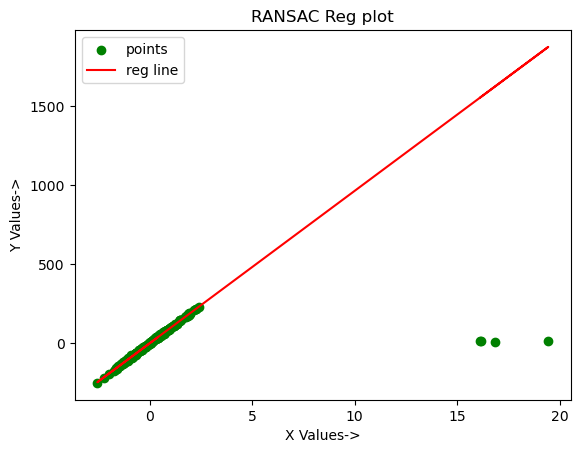

In [130]:
plt.scatter(X,y,c='green',label='points')
plt.plot(X,y_pred,c='red',label='reg line')
plt.legend()
plt.title('RANSAC Reg plot')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

In [135]:
# let's compare with original coeffss
print('Original : ',coef)
print('RANSAC : ',rs.estimator_.coef_)
print('Linear : ',lin.coef_)

Original :  96.19363785472291
RANSAC :  [96.3331388]
Linear :  [14.75401889]


### RANSAC too almost fit the model, best in the presence of outliers!

*Thats all about the more robustic regresson algorithms for dealing with the presence of outliers....*
--Abubacker S 🤞🤞